# Imports

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
from qiskit import QuantumCircuit
import time

# Utils

In [3]:
def timeit(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    duration = end_time - start_time
    print(f"Execution time for {func.__name__}: {duration: 0.6f}sec")
    return result
  return wrapper

In [4]:
X = np.array([[0, 1], [1, 0]], dtype=complex)
H =  1/np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=complex)
I = np.eye(2, dtype=complex)
zero = np.array([1, 0], dtype=complex)
one = np.array([0, 1], dtype=complex)

In [24]:
n = 2
qc = QuantumCircuit(n)
for i in range(n):
  qc.h(i)

for i in range(n-1):
  qc.x(i)
  qc.cx(i, i+1)

qc.draw()

┌───┐┌───┐     
q_0: ┤ H ├┤ X ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ H ├─────┤ X ├
     └───┘     └───┘

In [25]:
from qiskit.quantum_info import Statevector

# Get the final statevector
state = Statevector.from_instruction(qc)

# Print the statevector
print("Final statevector:\n", state)

Final statevector:
 Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [74]:
def cnot(control, target, num_qubits):
    cnot_mat = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], dtype=complex)
    """Create a CNOT gate acting on the full state space of 'num_qubits' qubits."""
    eye_before = np.eye(2**control)  # Identity for qubits before the control
    eye_after = np.eye(2**(num_qubits - target - 1))  # Identity for qubits after the target

    if control == 0:
        cnot_full = np.kron(cnot_mat, eye_after)
    else:
        cnot_full = np.kron(eye_before, np.kron(cnot_mat, eye_after))

    return cnot_full

@timeit
def statevector_simulation(n):
  state = np.zeros(2**n)
  state[0] = 1  # Initial state |0000⟩

  # Apply Hadamard to all qubits
  for i in range(n):
      H_full = np.kron(np.eye(2**i), np.kron(H, np.eye(2**(n-i-1))))
      state = H_full @ state

  # Apply Pauli-X to qubits 0 to n-2
  for i in range(n-1):
      X_full = np.kron(np.eye(2**i), np.kron(X, np.eye(2**(n-i-1))))
      state = X_full @ state

  # Apply CNOT gates between qubits i and i+1 (for i=0 to n-2)
  for i in range(n - 1):
      cnot_gate = cnot(i, i + 1, n)
      state = np.dot(cnot_gate, state)

  # Print the final statevector
  # print("Final statevector:")
  # print(state)
  return state


In [22]:
state = statevector_simulation(4)

NameError: name 'statevector_simulation' is not defined

In [ ]:
qubit_range = [4, 6, 8, 10, 12, 14]
for n_qubits in qubit_range:
  print(f"FOR N_QUBITS = {n_qubits}")
  state = statevector_simulation(n_qubits)

FOR N_QUBITS = 4
Execution time for statevector_simulation:  0.001679sec
FOR N_QUBITS = 6
Execution time for statevector_simulation:  0.031861sec
FOR N_QUBITS = 8
Execution time for statevector_simulation:  0.079717sec
FOR N_QUBITS = 10
Execution time for statevector_simulation:  0.579724sec
FOR N_QUBITS = 12
Execution time for statevector_simulation:  7.537008sec
FOR N_QUBITS = 14


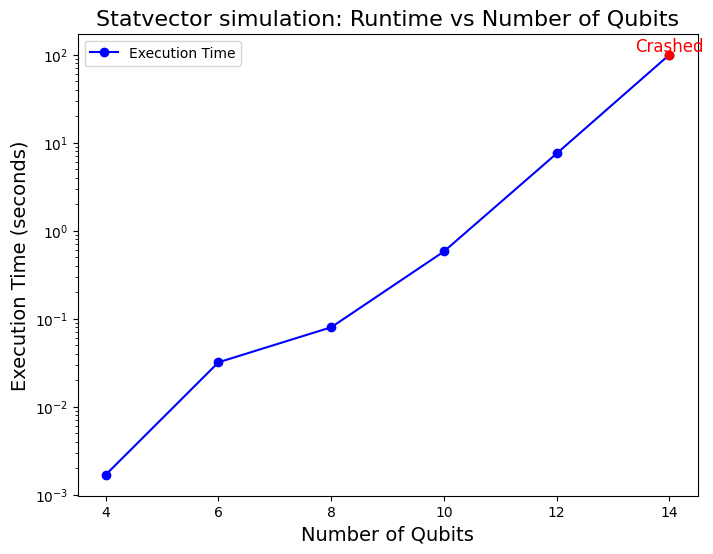

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n_qubits = np.array([4, 6, 8, 10, 12, 14])
runtimes = np.array([0.001679, 0.031861, 0.079717, 0.579724, 7.537008, 100])  # Mark crashed case with a large value

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(n_qubits, runtimes, marker='o', label='Execution Time', color='b')

plt.plot(14, 100, 'ro')  # Red point for the crashed case
plt.text(14, 110, 'Crashed', color='red', fontsize=12, ha='center')

# Set log scale for the y-axis due to wide range of runtimes
plt.yscale('log')

# Adding labels and title
plt.xlabel('Number of Qubits', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.title('Statvector simulation: Runtime vs Number of Qubits', fontsize=16)

# Add grid and legend
# plt.grid(True, which="both", ls="--")
plt.legend()

# Display the plot
plt.show()


In [37]:
import numpy as np

# Define the Pauli-X, Hadamard, and CNOT gates
X = np.array([[0, 1],
              [1, 0]], dtype=complex)

H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]], dtype=complex)

CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex).reshape(2, 2, 2, 2)

# Decompose CNOT gate into control and target operations
C_control = np.array([[1, 0], [0, 1]], dtype=complex)  # Control qubit's operation is the identity
C_target = np.array([[1, 0], [0, 1]], dtype=complex)   # Target qubit's conditional operation

# Function to apply a 1-qubit gate to the state tensor
def apply_1qubit_gate(state_tensor, gate, qubit, n_qubits):
    """
    Apply a 1-qubit gate to a specific qubit in the quantum state tensor using np.einsum.
    """
    # Prepare the einsum subscript for applying gate to specific qubit
    subscripts = ''.join([chr(97 + i) for i in range(n_qubits)])  # Subscript for all qubits
    gate_subscript = f'{chr(97 + qubit)}{chr(97 + qubit + n_qubits)}'  # Subscript for gate
    # Create einsum string for gate application
    einsum_str = f'{gate_subscript},{subscripts}->{subscripts[:qubit] + chr(97 + qubit + n_qubits) + subscripts[qubit+1:]}'
    # Apply the gate
    new_state = np.einsum(einsum_str, gate, state_tensor)
    return new_state

def apply_cnot_gate(state_tensor, control, target, n_qubits):
    """
    Apply a CNOT gate by splitting it into control and target operations.
    Apply control part to control qubit and target part to the target qubit.
    """

    # Apply the control operation to the control qubit (identity for control)
    subscripts = ''.join([chr(97 + i) for i in range(n_qubits)])
    gate_subscript = f'{chr(97 + control)}{chr(97 + control + n_qubits)}{chr(97 +target)}{chr(97+target+n_qubits)}'  # Subscript for gate

    # Create einsum string for applying CNOT gate to control and target qubits
    einsum_str = f'{gate_subscript},{subscripts}->{subscripts[:control]}{chr(97 + control + n_qubits)}{subscripts[control+1:target]}{chr(97 + target + n_qubits)}{subscripts[target+1:]}'
    # print(einsum_str)
    # Apply the CNOT gate
    new_state = np.einsum(einsum_str, CNOT, state_tensor)
    return new_state

@timeit
# Function to simulate the quantum circuit using numpy tensors
def tensor_network_simulation(n):
    # Step 1: Initialize the |000...0⟩ state as a numpy tensor
    state = np.zeros([2] * n, dtype=complex)
    state[tuple([0] * n)] = 1  # Start in the |000...0⟩ state

    # Step 2: Apply Hadamard gate to each qubit
    for i in range(n):
        state = apply_1qubit_gate(state, H, i, n)

    # # Step 3: Apply Pauli-X gate to qubits 0 to n-2
    for i in range(n - 1):
        state = apply_1qubit_gate(state, X, i, n)

    # Step 4: Apply CNOT gates between qubits i and i+1
    for i in range(n - 1):
        state = apply_cnot_gate(state, i, i + 1, n)

    # Step 5: Flatten the tensor to a 1D statevector
    state_vector = state.flatten()

    return state_vector

# Example for 3 qubits
final_state = tensor_network_simulation(6)
# print("Final statevector:")
# print(final_state)


Execution time for tensor_network_simulation:  0.000378sec


In [39]:
qubit_range = [4, 6, 8, 10, 12]
for n_qubits in qubit_range:
  print(f"FOR N_QUBITS = {n_qubits}")
  state = tensor_network_simulation(n_qubits)

FOR N_QUBITS = 4
Execution time for tensor_network_simulation:  0.000247sec
FOR N_QUBITS = 6
Execution time for tensor_network_simulation:  0.000327sec
FOR N_QUBITS = 8
Execution time for tensor_network_simulation:  0.000799sec
FOR N_QUBITS = 10
Execution time for tensor_network_simulation:  0.012590sec
FOR N_QUBITS = 12
Execution time for tensor_network_simulation:  0.009018sec


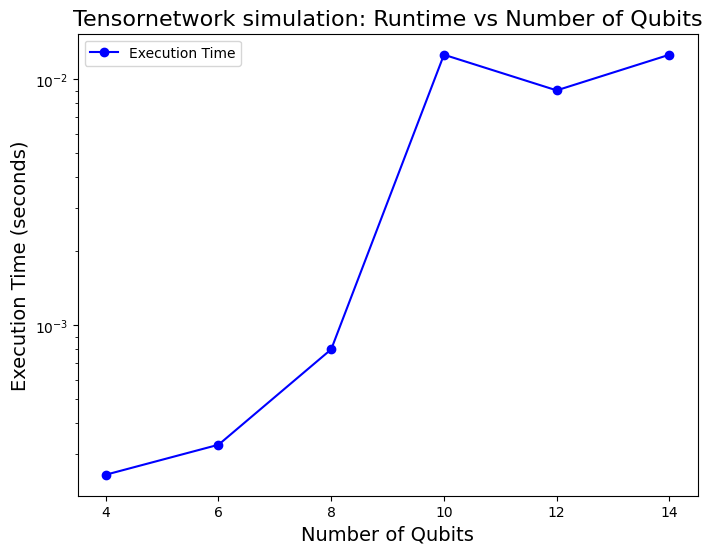

In [42]:
import matplotlib.pyplot as plt
import numpy as np

n_qubits = np.array([4, 6, 8, 10, 12, 14])
runtimes = np.array([0.000247, 0.000327, 0.000799, 0.012590, 0.009018, 0.012590])  # Mark crashed case with a large value

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(n_qubits, runtimes, marker='o', label='Execution Time', color='b')

# Set log scale for the y-axis due to wide range of runtimes
plt.yscale('log')

# Adding labels and title
plt.xlabel('Number of Qubits', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.title('Tensornetwork simulation: Runtime vs Number of Qubits', fontsize=16)

# Add grid and legend
# plt.grid(True, which="both", ls="--")
plt.legend()

# Display the plot
plt.show()